## ILDEBRANDO MAGNANI

im975

Homework 9:

## Excercise 6:

In [44]:
% matplotlib inline
import numpy as np
import numpy.linalg as ln
import matplotlib.pyplot as plt
import quantecon as qe

In [36]:
A = np.array([[ 0.8, -0.1],
              [-0.1,  0.8]])

C= np.identity(2)

D = np.identity(2)

In [37]:
def spec_radius(A):
    a, b = ln.eig(A)
    rho = np.amax(np.abs(a))
    return rho

In [38]:
def LQ_price(A, D, C, Initial_P, beta, tol, maxit):
    stability = 1 / np.sqrt(beta)
    if spec_radius(A) > stability:
        print("The stability condition is not met")
    else:
        P = Initial_P
        for i in range(maxit):
            P_new = beta * np.transpose(A) @ (D + P) @ A
            diff = P_new - P
            spectral_distance = np.sqrt(spec_radius(diff))
            P = P_new
            if spectral_distance <= tol:
                maxit = i
                break
        print("Number of Iterations to compute the Price Function:", maxit)
            
    delta = (beta / 1 - beta) * np.trace(np.transpose(C) @ (D + P_new) @ C)
    
    return P_new, delta

In [39]:
Initial_P = np.identity(len(A))
tol = 10**(-8)
maxiteration = 10000
beta = 0.9

Price_matrix, Delta_star = LQ_price(A, D, C, Initial_P, beta, tol, maxiteration)
print("Price_matrix:")
print(Price_matrix)

Number of Iterations to compute the Price Function: 113
Price_matrix:
[[ 1.73947283 -0.95056407]
 [-0.95056407  1.73947283]]


In [40]:
def price_fun(x, Price_matrix, Delta):
    return np.transpose(x) @ Price_matrix @ x + Delta

Number of Iterations to compute the Price Function: 113


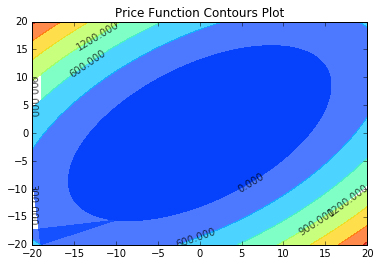

In [69]:
N = 200
grid = np.linspace(-20, 20, N)
x = np.zeros((2,1))
X, Y = np.meshgrid(grid, grid)
Price_val = np.zeros((N, N))
Price_matrix, Delta = LQ_price(A, D, C, Initial_P, beta, tol, maxiteration)

for k in range(N):
    for j in range(N):
        x[0] = grid[k]
        x[1] = grid[j]
        Price_val[k, j] = price_fun(x, Price_matrix, Delta)

CS = plt.contourf(X, Y, Price_val, alpha=0.7)
plt.clabel(CS, inline=1, fontsize=10, colors='black')
plt.title('Price Function Contours Plot')
plt.show()
